# Example notebook for import-export operations with pyMOE

In the following is exemplified how to: 
* Transform a (multi-layer) .gds file into a grayscale image file (allowed extensions as accepted by opencv, e.g. .tiff, .png, .jpg ...)
* Transform a grayscale image file into a dithered image file
* Transform a grayscale image file (.tiff, .png, ...) into a gds file (with  squared pixels) 
* Extra: Merge all pixels (or shapes) in a layer inside a .gds file 

In [1]:
%matplotlib notebook
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}

import sys
sys.path.insert(0,'..')
sys.path.insert(0,'../..')
sys.path.insert(0,'../../..')

In [2]:
import pyMOE as moe 
import pyMOE.impor as imp
import pyMOE.export as exp

## Transform layered .gds file into a grayscale image

<IPython.core.display.Javascript object>


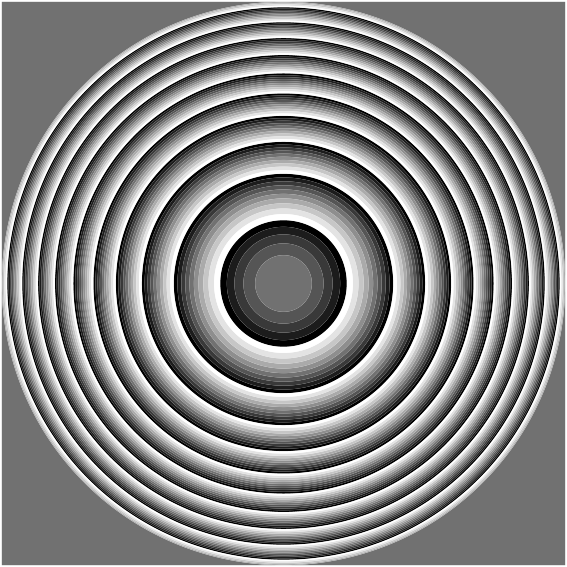

184 polygons found...
Layers: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Datatypes: [0]
0.0
There is an invalid polygon at 0, but I will proceed, please check the result at the end
0.125
There is an invalid polygon at 1, but I will proceed, please check the result at the end
0.25
There is an invalid polygon at 2, but I will proceed, please check the result at the end
0.375
There is an invalid polygon at 3, but I will proceed, please check the result at the end
0.5
There is an invalid polygon at 4, but I will proceed, please check the result at the end
0.625
There is an invalid polygon at 5, but I will proceed, please check the result at the end
0.75
There is an invalid polygon at 6, but I will proceed, please check the result at the end
0.875
There is an invalid polygon at 7, but I will proceed, please check the result at the end
1.0
There is an invalid polygon at 8, but I will proceed, please check the result at the end
1.125
There is an invalid polygon at 9, but I will proceed, please check the 

In [3]:
infile = "fresnel_phase_mask.gds"
outfile = "fresnel_phase_mask.tiff"
n=10 

moe.imp.gds2img(infile, outfile, int(n-1), verbose=True)

## Transform grayscale image into (binary) dithered image 

<IPython.core.display.Javascript object>


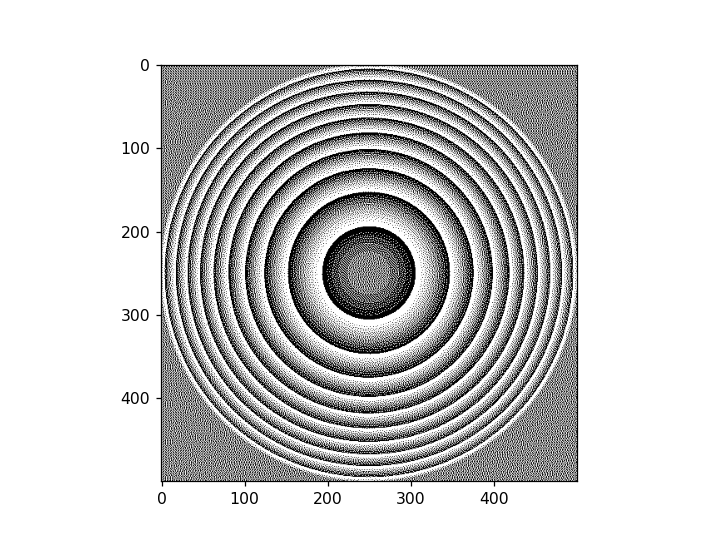

In [4]:
##Make a dithered mask from the tiff obtained from the gds 
import pyMOE.dither as dith

inputimg = "fresnel_phase_mask.tiff"
ditherimg = "fresnel_phase_mask_ditherx.tiff"

#make dithering using the floyd steinberg algorithm mow
moe.dith.dither_img(inputimg, ditherimg, plotting=True)

## Transform binary image file into single layered .gds file

Transform a dithered image into a gds file, using a fractioning of the image


In [5]:
#(Takes about 4 min )

infilxe = "fresnel_phase_mask_ditherx.tiff"
outfilxe = "fresnel_phase_mask_frac.gds"
pixelx = 1 #um 
pixely = 1 #um 
cellname = "TOP" #name of the gds cell 
graycolor = 0 #black pixels 
frac = 250 #size of frac pixels in the image 

moe.exp.grayim2gds_writer_frac(infilxe, outfilxe, pixelx, pixely, cellname, graycolor, frac, verbose=False)

Sucessfully imported img!
500
500
[  0 250 500]
0
0
250
250
0
250
5
Exported the image file fresnel_phase_mask_ditherx.tiff into fresnel_phase_mask_frac.gds


Transform a dithered image into a .gds file, using the whole image 

In [6]:
#(Takes about 9 min ) 

infilxe = "fresnel_phase_mask_ditherx.tiff"
outfilxe = "fresnel_phase_mask_dithered.gds"
cellname = "TOP" #name of the gds cell 
graycolor = 0 #black pixels 
pixelx = 1 #um 
pixely = 1 #um 

moe.exp.grayim2gds_writer(infilxe, outfilxe, pixelx, pixely,cellname, graycolor, verbose=False)

Sucessfully imported img!
500
500
Exported the image file fresnel_phase_mask_ditherx.tiff into fresnel_phase_mask_dithered.gds


In [7]:
###Using instances to create the dithered gds file (faster and less heavy files)

#(Takes less than 1 min)
infilxe = "fresnel_phase_mask_ditherx.tiff"
outfilxe = "fresnel_phase_mask_dithered2.gds"
cellname = "tops" #name of the gds cell 
graycolor = 0 #black pixels 
pixelx = 1 #um 
pixely = 1 #um 

moe.exp.grayim2gds_writer_klops(infilxe, outfilxe, pixelx, pixely,cellname, graycolor, verbose=False)

Sucessfully imported img!
500
500
Exported the image file fresnel_phase_mask_ditherx.tiff into image.gds
Starting making instances
Done


## Extra: Merging shapes in the single layer .gds file 

The "pixelated" gds files (without instances) are typically large. The file size can be reduced by merging the pixels - the merge operation can be done using the gds_klops module

In [8]:
#(Takes about 13 min )
import pyMOE.gds_klops as gdsops 

inputfile = "fresnel_phase_mask_dithered.gds"
outputfile = "fresnel_phase_mask_dithered+merged.gds"
cellname = "TOP" #name of the gds cell 
layer = int(0)
datatype = int(0)

moe.gdsops.merge_layer(inputfile,cellname, layer, datatype ,outputfile )

Merged layers in fresnel_phase_mask_dithered+merged.gds


In [9]:
#(Takes less than 1 min )
#uses the instatiated gds 
inputfile = "fresnel_phase_mask_dithered2.gds"
outputfile = "fresnel_phase_mask_dithered2+merged.gds"
cellname = "TOP" #name of the gds cell 
layer = int(0)
datatype = int(0)

moe.gdsops.merge_layer(inputfile,cellname, layer, datatype ,outputfile )

Merged layers in fresnel_phase_mask_dithered2+merged.gds


In [ ]:
###Transform a STL into a GDS 